<a href="https://colab.research.google.com/github/ragavkish/e-com_transaction/blob/main/Ragavkishore_DM_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

##**Load Datasets**

In [3]:
customers = pd.read_csv('/content/datasets/Customers.csv')
products = pd.read_csv('/content/datasets/Products.csv')
transactions = pd.read_csv('/content/datasets/Transactions.csv')

##**Merge datasets**

In [6]:
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print(data.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


##**Feature Engineering**

In [8]:
customer_agg = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Price_x': 'mean',
    'Category': lambda x: x.mode()[0],
    'Region': 'first',
    'SignupDate': 'first',
})

In [9]:
customer_agg.rename(columns={
    'TotalValue': 'TotalSpent',
    'TransactionID': 'NumTransactions',
    'Price': 'AvgPrice',
    'Category': 'PreferredCategory',
    'Region': 'Region',
}, inplace=True)

##**Encode categorical variables**

In [10]:
le_region = LabelEncoder()
le_category = LabelEncoder()
customer_agg['Region'] = le_region.fit_transform(customer_agg['Region'])
customer_agg['PreferredCategory'] = le_category.fit_transform(customer_agg['PreferredCategory'])

##**Normalize features**

In [11]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(customer_agg.drop(columns=['SignupDate']))

##**Clustering**

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
customer_agg['Cluster'] = clusters

##**Metrics**

In [13]:
db_index = davies_bouldin_score(data_scaled, clusters)
silhouette_avg = silhouette_score(data_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')

Davies-Bouldin Index: 1.3511189931997798
Silhouette Score: 0.21643808674285228


##**PCA for visualization**

In [14]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

##**Visualize clusters**

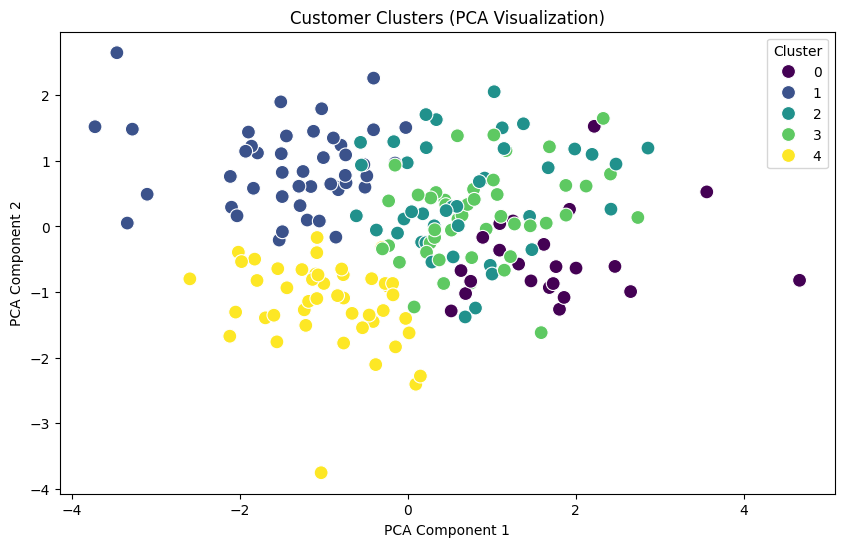

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('Customer Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()